In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sys
import os
sys.path.insert(0, os.path.abspath('..'))

from latexify import latexify, format_axes
from watermark  import watermark

In [5]:
X_train = np.load('../FinalDataset/X_train.npy')
X_test = np.load('../FinalDataset/X_test.npy')
y_train = np.load('../FinalDataset/y_train.npy')
y_test = np.load('../FinalDataset/y_test.npy')

print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)


(126, 500, 3) (126,)
(54, 500, 3) (54,)


In [6]:
# mapping class labels to activity names , as provided in activity_labels.txt
classes = {1: "WALKING", 2: "WALKING_UPSTAIRS", 3: "WALKING_DOWNSTAIRS", 4: "SITTING", 5: "STANDING", 6: "LAYING"}

activity_samples = {}# stores one sample from each activity class
for activity_class, activity_name in classes.items():
    activity_samples[activity_name] = X_train[y_train == activity_class][0]


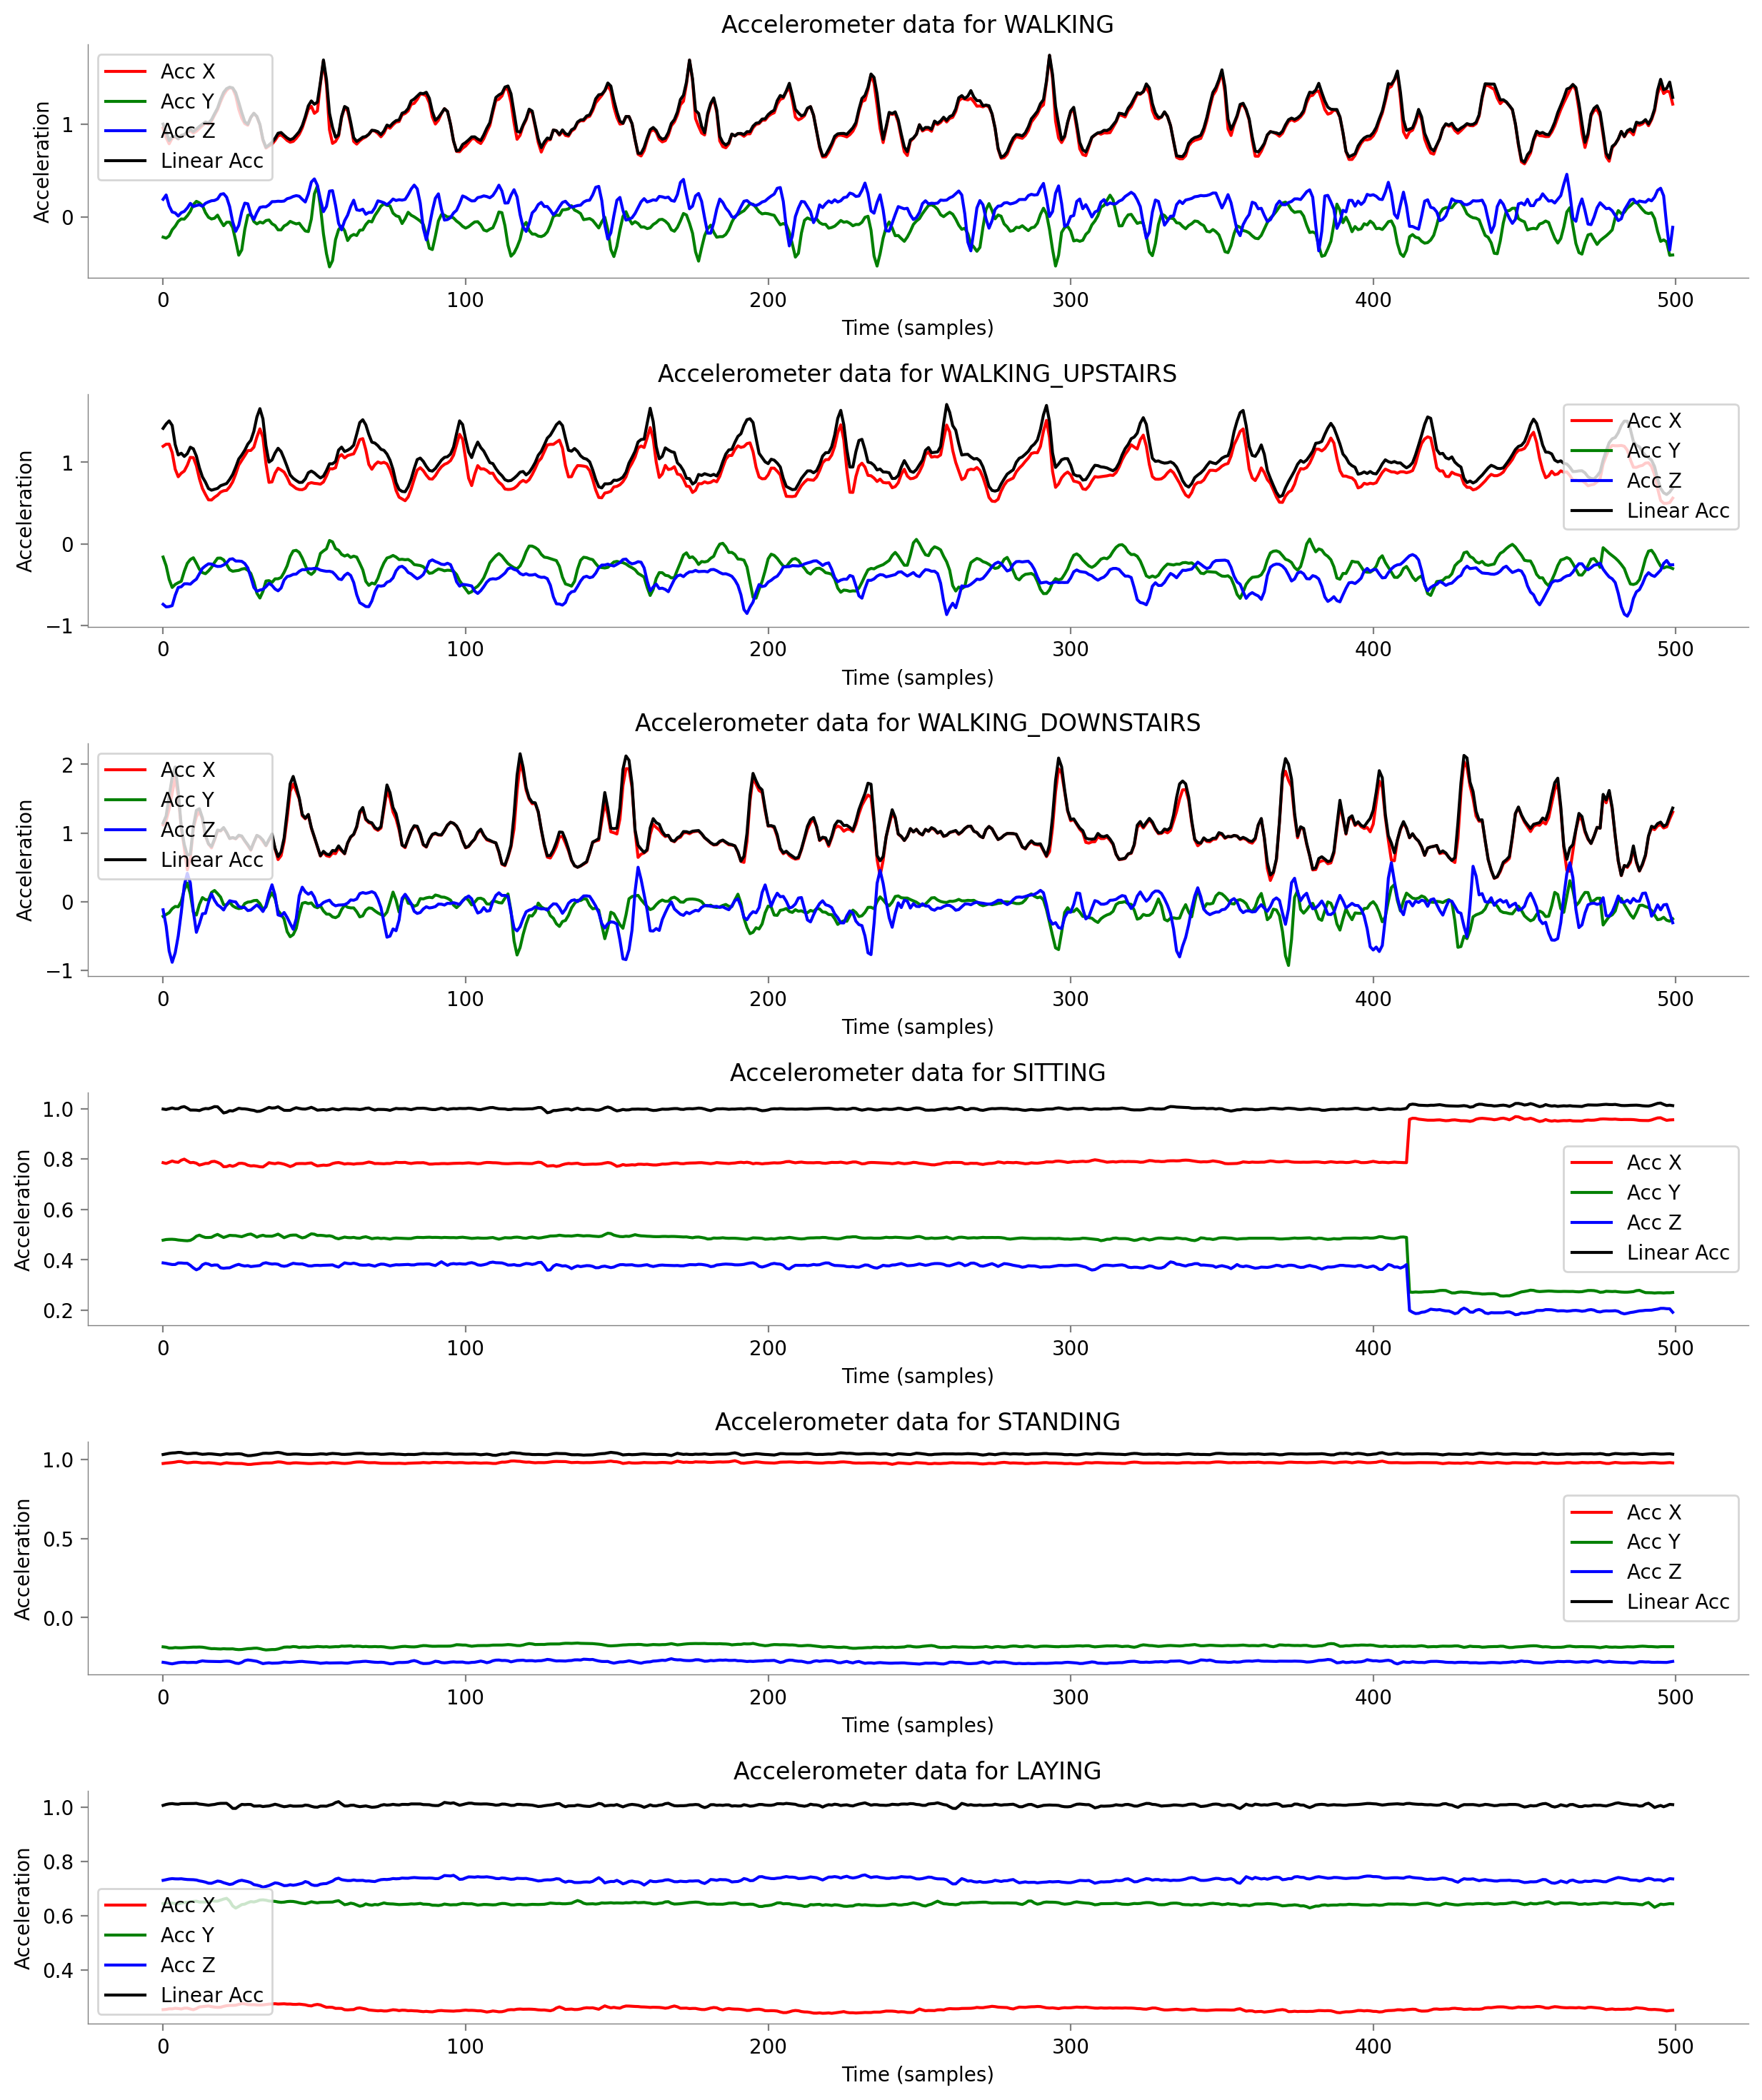

In [12]:
# Set up the figure and gridspec
fig = plt.figure(figsize=(15, 18))
gs = gridspec.GridSpec(len(classes), 1, hspace=0.5)

# Plot each activity's accelerometer data along with the linear acceleration
for i, (activity_name, sample) in enumerate(activity_samples.items()):
    ax = fig.add_subplot(gs[i, 0])
    
    # Calculate linear acceleration
    linear_acc = np.sqrt(np.sum(sample**2, axis=1))
    
    # Plot the x, y, z acceleration data
    ax.plot(sample[:, 0], label='Acc X', color='red')
    ax.plot(sample[:, 1], label='Acc Y', color='green')
    ax.plot(sample[:, 2], label='Acc Z', color='blue')
    
    # Plot the linear acceleration
    ax.plot(linear_acc, label='Linear Acc', color='black')
    
    ax.set_title(f"Accelerometer data for {activity_name}")
    ax.set_xlabel("Time (samples)")
    ax.set_ylabel("Acceleration")
    ax.legend()
    format_axes(ax)

plt.show()
